In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

dataframe = pd.read_csv("/Users/aditya/Downloads/CarPrice_Assignment.csv")


le = LabelEncoder()
non_integer_columns = dataframe.select_dtypes(include=['object']).columns
for col in non_integer_columns:
    dataframe[col] = le.fit_transform(dataframe[col])





In [4]:
def normalize(dataframe):
    means = dataframe.mean()
    standard_deviations = dataframe.std()
    scaled_dataframe = (dataframe - means) / standard_deviations
    return scaled_dataframe, means['price'], standard_deviations['price']


In [5]:


def cost(X, y, theta):
    m = len(X)
    c = 1 / (2 * m)
    temp_0 = np.dot(X, theta) - y
    temp_1 = temp_0.transpose()
    temp_2 = np.dot(temp_1, temp_0)
    return c * temp_2


In [6]:


def gradient_descent(X, y, theta, alpha, iterations):
    m = len(X)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        temp_0 = np.dot(X, theta) - y
        temp_1 = np.dot(X.transpose(), temp_0)
        theta = theta - (alpha / m) * temp_1
        cost_history[i] = cost(X, y, theta)
    return theta, cost_history


In [7]:

X = dataframe.drop(columns=['car_ID'])
X, mean_price, std_price = normalize(X)
X.insert(0, 'X_0', 1) 

y = dataframe['price'].to_numpy()


train_ratio = 0.8
train_size = int(train_ratio * len(dataframe))

X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

theta = np.zeros(X_train.shape[1])

alpha = 0.02
iterations = 1500


theta, cost_history = gradient_descent(X_train, y_train, theta, alpha, iterations)


y_pred_test = np.dot(X_test, theta)



In [8]:

def r_squared(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

r2_test = r_squared(y_test, y_pred_test)
print("R^2 on test set:", r2_test)



R^2 on test set: 0.9943717129637316


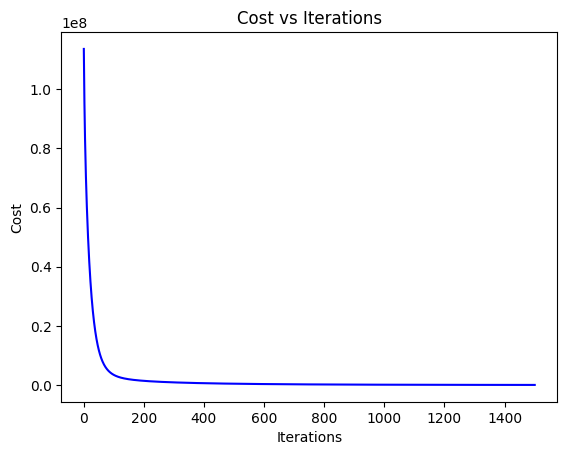

In [9]:
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()